In [1]:
pip install uproot

  Using cached uproot-5.0.10-py3-none-any.whl (333 kB)
  Using cached awkward-2.3.1-py3-none-any.whl (631 kB)
  Using cached awkward_cpp-21-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy
import pandas as pd
import uproot
import seaborn as sns
import matplotlib.pyplot as plt
root = uproot.open("Desktop/lephad.root")
root.keys()

['tHqLoop_nominal_Loose;1', 'tHqLoop_nominal_Loose_meta;1']

In [3]:
tree=root["tHqLoop_nominal_Loose"]
#tree.keys()

In [4]:
data1=tree['pt_b'].array(library="numpy")
data2=tree['pt_jf'].array(library="numpy")
df1=pd.DataFrame(data1)
df2=pd.DataFrame(data2)

#df1
#df1

In [5]:
R1 = numpy.corrcoef(data1,data2)
R1

array([[1.       , 0.1424451],
       [0.1424451, 1.       ]])

In [6]:
#Puts the name of the varibales from the contents of the file, removes /n for all except last and appends into list keys
keys=[]
with open('Desktop/tHq_Varlist_ckirfel_lephad.txt') as topo_file:
    for line in topo_file:
        if line=='lep_top_higgs_mass':
            data=tree[str(line)].array(library='pd')
            keys.append(str(line))
        else:
            line=str(line.replace(str(line[-1]),''))
            keys.append(str(line))

In [7]:
#Generates a Pandas Dataframe from the file in String Generator
dataframe=tree.arrays(keys,library='pd')
corrM=dataframe.corr() #Computes correlation 

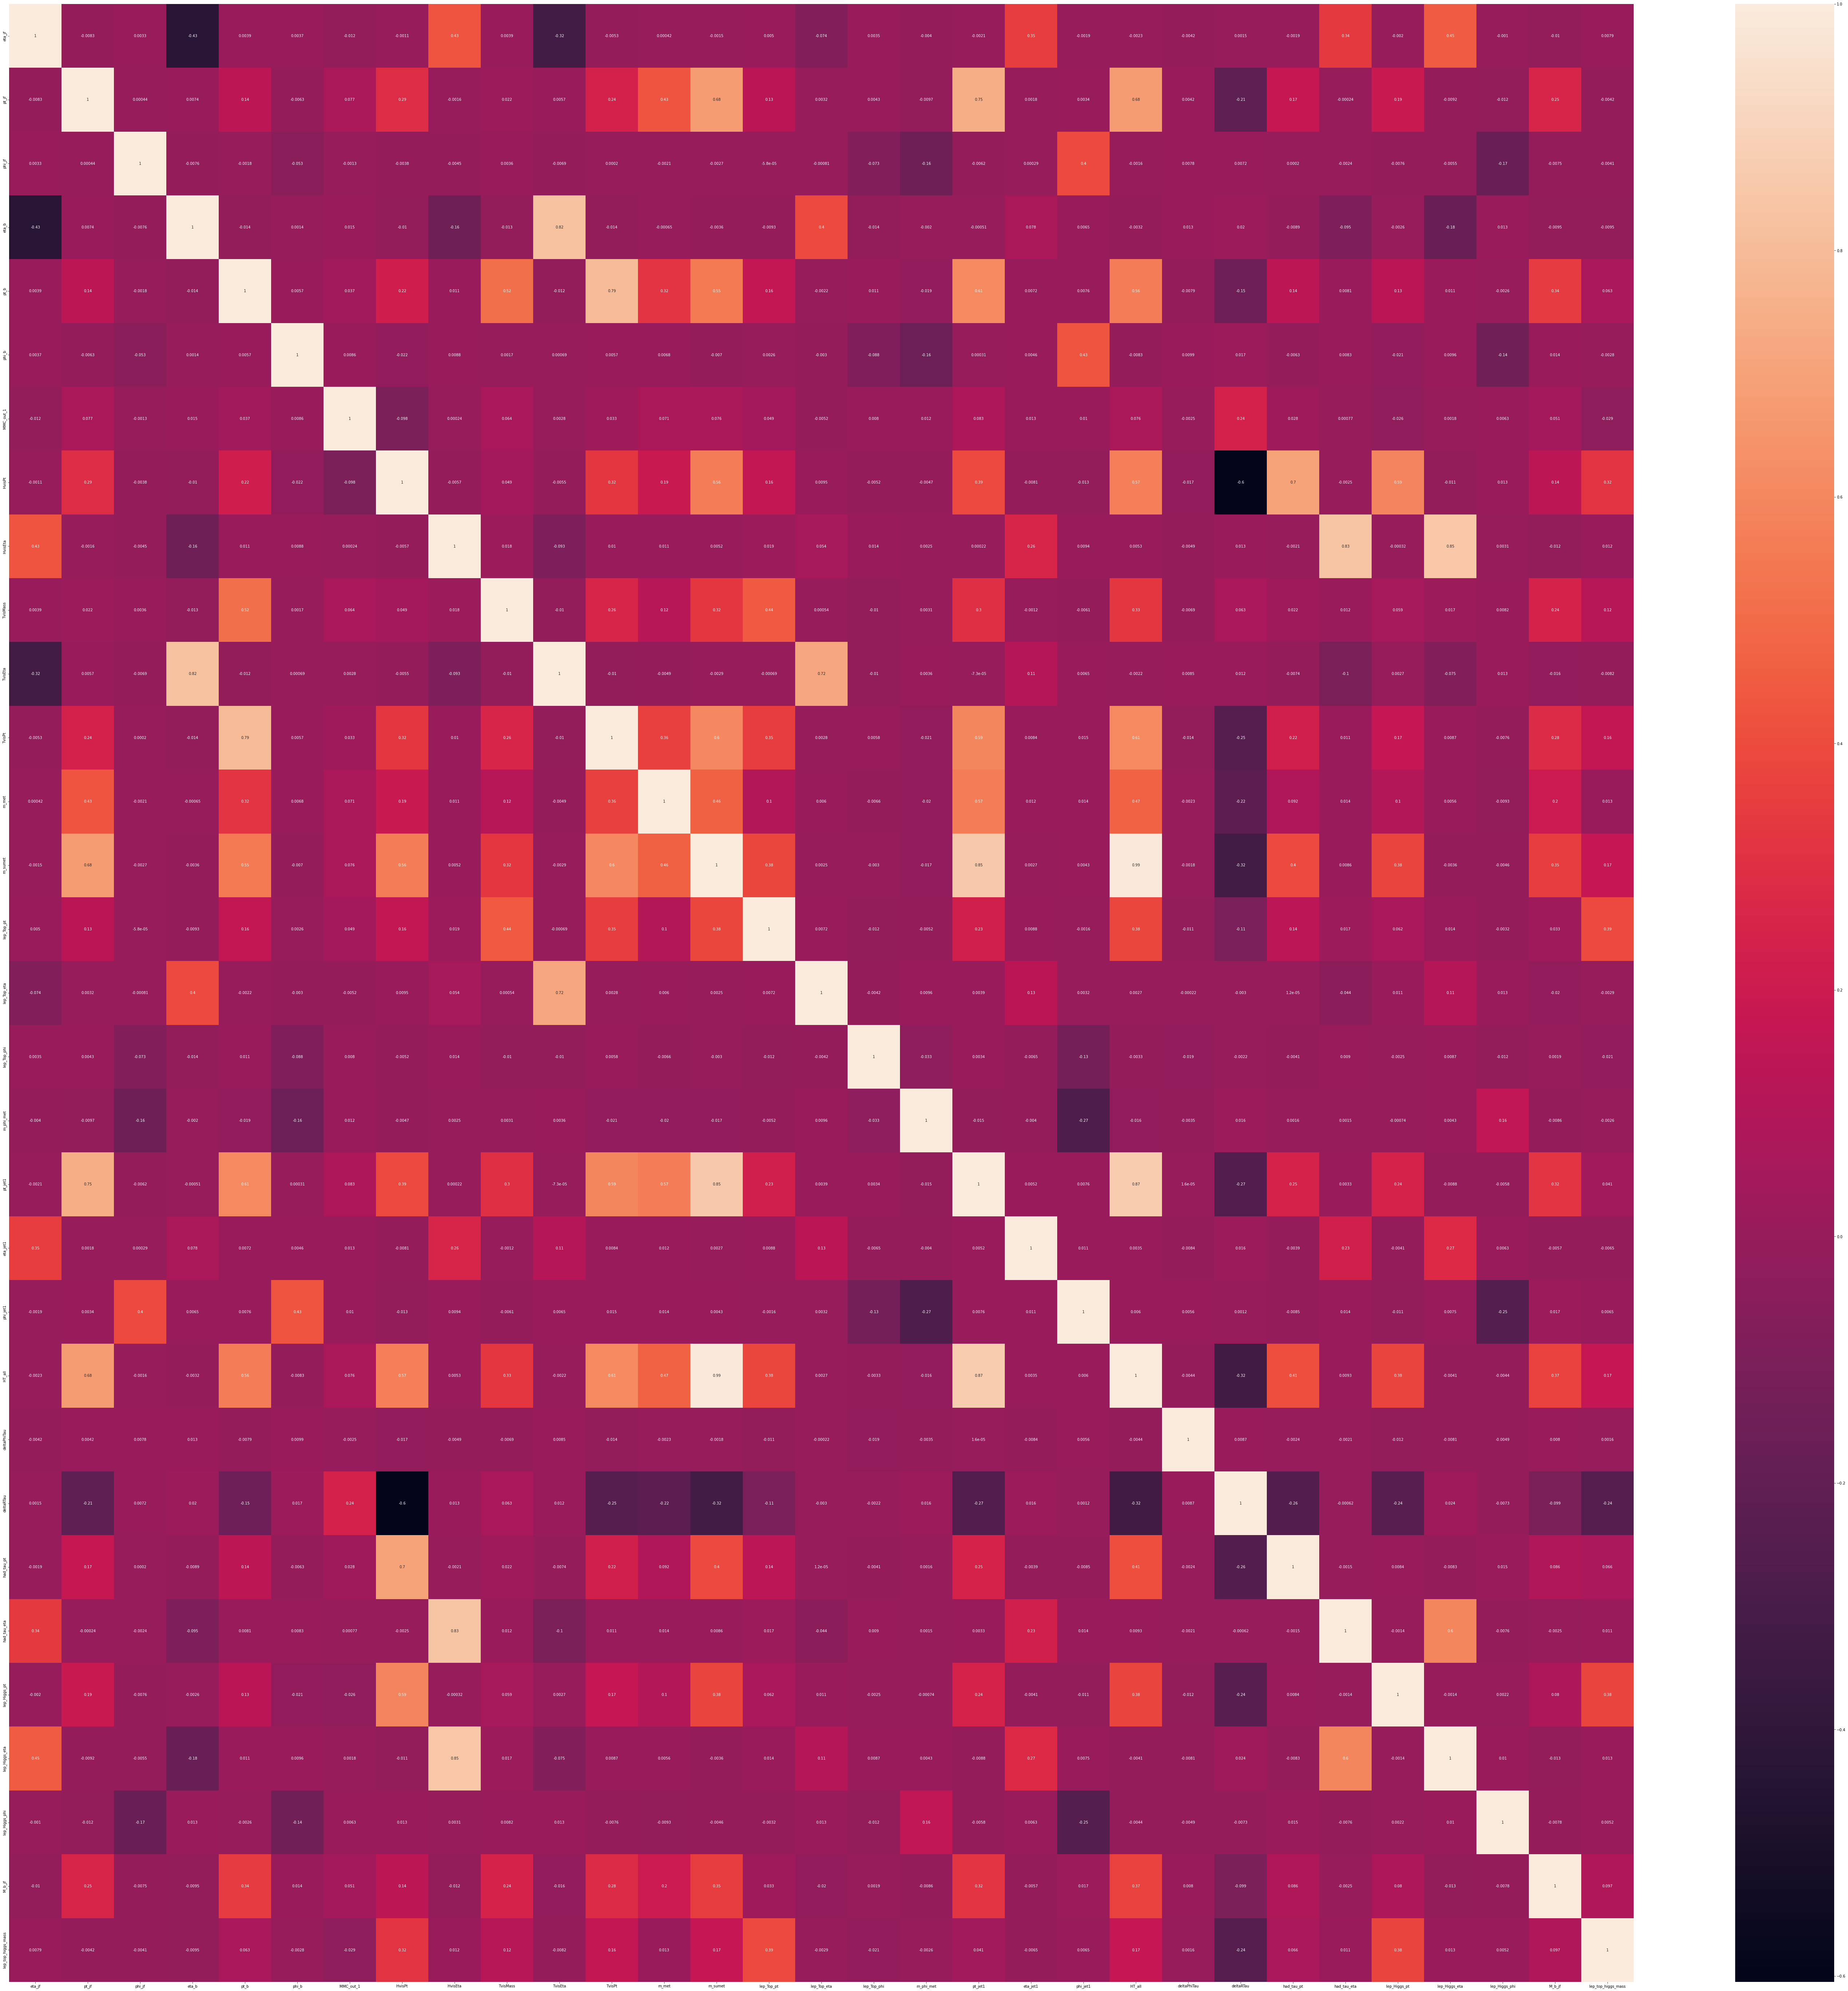

In [8]:
plt.figure(figsize=(100,100))
sns.heatmap(corrM,annot=True)
sns.set(font_scale=20) # font size 2

In [9]:
Mean=pd.Series.mean(corrM)
Mean

eta_jf                0.055385
pt_jf                 0.155292
phi_jf                0.029005
eta_b                 0.044844
pt_b                  0.175977
phi_b                 0.032720
MMC_out_1             0.057606
HvisPt                0.152063
HvisEta               0.105949
TvisMass              0.127347
TvisEta               0.065165
TvisPt                0.185443
m_met                 0.138602
m_sumet               0.239596
lep_Top_pt            0.126953
lep_Top_eta           0.074822
lep_Top_phi           0.019851
m_phi_met             0.014129
pt_jet1               0.219243
eta_jet1              0.080040
phi_jet1              0.041594
HT_all                0.242081
deltaPhiTau           0.030020
deltaRTau            -0.060240
had_tau_pt            0.111012
had_tau_eta           0.092404
lep_Higgs_pt          0.111353
lep_Higgs_eta         0.099971
lep_Higgs_phi         0.019859
M_b_jf                0.118907
lep_top_higgs_mass    0.087445
dtype: float64

In [10]:
Mean.sort_values(ascending=False)

HT_all                0.242081
m_sumet               0.239596
pt_jet1               0.219243
TvisPt                0.185443
pt_b                  0.175977
pt_jf                 0.155292
HvisPt                0.152063
m_met                 0.138602
TvisMass              0.127347
lep_Top_pt            0.126953
M_b_jf                0.118907
lep_Higgs_pt          0.111353
had_tau_pt            0.111012
HvisEta               0.105949
lep_Higgs_eta         0.099971
had_tau_eta           0.092404
lep_top_higgs_mass    0.087445
eta_jet1              0.080040
lep_Top_eta           0.074822
TvisEta               0.065165
MMC_out_1             0.057606
eta_jf                0.055385
eta_b                 0.044844
phi_jet1              0.041594
phi_b                 0.032720
deltaPhiTau           0.030020
phi_jf                0.029005
lep_Higgs_phi         0.019859
lep_Top_phi           0.019851
m_phi_met             0.014129
deltaRTau            -0.060240
dtype: float64